In [1]:
##############################################################
# An airline knows that over the long run, 90% of  passengers
# who reserve seats show up for their flight. On a particular 
# flight with 300 seats, the airline accepts 324 reservations.
#
# file: prob_cl_airline_sol.R
##############################################################

# a) Assuming that passengers show up independently of each other,
# what is the chance that a passenger with a reservation do not 
# get a seat?
n <- 324; p <- 0.9
# exact value
p_ex <- 1-pbinom(300.5,n,p)
p_ex
# approx. value
m <- n*p; s <- sqrt(n*p*(1-p))
p_app <- 1-pnorm(300.5,m,s)
p_app

# b) How many reservations can be given, if the airline will
# accept an overbooking probability of 1%?

# exact bound
n <- seq(301,350,1)
p_ex <- pbinom(300,n,p)
o_ex <- n[max(which(p_ex >= 0.99))]
o_ex

# approx. bound
m <- n*p; s <- sqrt(n*p*(1-p))
p_app <- pnorm(300.5,m,s)
o_app <- n[max(which(p_app >= 0.99))]
o_app

# alternative solution: solving the equation
# (300.5 - p*n)^2 = p*(1-p)*u^2_0.99*n
# quadratic equation: n^2 + a*n +b =0
u_099 <- qnorm(0.99,0,1)
#u_099
#p
a <- -(2*p*300.5 + p*(1-p)*u_099^2)/(p^2)
b <- (300.5/p)^2
# a;b
n1 <- -a/2 + sqrt((a/2)^2 -b)
n2 <- -a/2 - sqrt((a/2)^2 -b)
n1; n2 
300.5-n1*p 
300.5-n2*p 

# solution without solving the above equation
library(tidyverse)
tibble(
  n = 300:324,
  p = 1-pbinom(300, size = n, prob = 0.9),
  p.app = 1-pnorm(300.5, mean = n*0.6, sd = sqrt(n*0.9*0.1))
) %>% filter(p >= 0.01) %>% filter(n == min(n)) # n < 321!!

[1] 0.04473426

[1] 0.04966114

[1] 320

[1] 320

[1] 348.3622

[1] 320.0169

[1] -13.02601

[1] 12.48482

-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v dplyr     1.1.4     v readr     2.1.5
v forcats   1.0.0     v stringr   1.5.1
v ggplot2   3.5.0     v tibble    3.2.1
v lubridate 1.9.3     v tidyr     1.3.1
v purrr     1.0.2     
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


n,p,p.app
<int>,<dbl>,<dbl>
321,0.01162561,0


In [2]:
##################################################################
# A machine consists of the three modules A, B and C. The machine
# works only if all three modules are working and if no error
# occured during the construction phase. The probabilities that 
# the modules A, B and C are defect are 1%, 1% and 5%. The 
# probability for an error during the construction phase 2%. The
# four kinds of errors occur independently of each other. 
#
# file: prob_cl_modules_sol.R
##################################################################

# a) Calculate the expectation and the variation of the number of 
# defect machines in a lot of 1000 randomly chosen machines. 
n <- 1000
pa <- 0.01
pb <- 0.01
pc <- 0.05
pcp <- 0.02
# prob. of no error
p_no_error <- (1-pa)*(1-pb)*(1-pc)*(1-pcp)
# expected value
exp_n_def <- n*(1-p_no_error)
# variance
var_n_def <- n*(1-p_no_error)*p_no_error
p_no_error; exp_n_def; var_n_def

# b) The producer is thinking about guaranteeing that not more 
# than 110 machines are defect in such a lot. With which approximate 
# probability can this guarantee promise be kept?  
pbinom(110,n,1-p_no_error) # 0.9936782
# approximation by a normal distribution
# without continuity correction
pnorm(110,mean=exp_n_def,sd=(var_n_def)^0.5) # 0.9940429
# with continuity correction
pnorm(110.5,mean=exp_n_def,sd=(var_n_def)^0.5) # 0.9949242

# c) Each defect machine provokes an extra cost of 100 euro. 
# The producer considers to buy a better module C (at a higher
# price) but with an error rate of is 1%. How high can the 
# additional cost for each machine for module C be, in order to
# say that it is (according to the expectation) profitable to buy
# the more expensive module C?
p_no_error_new <- (1-pa)*(1-pb)*(1-0.01)*(1-pcp)
100*(1-p_no_error) - 100*(1-p_no_error_new)


[1] 0.9124731

[1] 87.5269

[1] 79.86594

[1] 0.9936782

[1] 0.9940429

[1] 0.9949242

[1] 3.841992

In [3]:
###################################################################
# As a new residential area with 1000 domestic homes  is going 
# to be built, the number of required parking lots is calculated
# in the following way: We assume that there is no relation between
# the number of cars in different homes. Furthermore, we assume 
# that a domestic home has no car with probability 0.2, one car 
# with probability 0.7 and two cars with probability 0.1. The number
# of parking lots should be planned in such way that the probability
# that each car gets a parking lot is 0.99. How many parking lots 
# should be built?
#
# file: prob_cl_res_area_sol.R
###################################################################

p0 <- 0.2
p1 <- 0.7
p2 <- 0.1
n <- 1000
# expected values
EX <- 0*p0 + 1*p1 + 2*p2
EX2 <- 0^2*p0 + 1^2*p1 + 2^2*p2
# variance
VarX <- EX2 - (EX)^2
EX
VarX
# 99% quantile
qnorm(0.99,n*EX,(n*VarX)^0.5) # 939.6163

[1] 0.9

[1] 0.29

[1] 939.6163

In [4]:
#################################################################
# The weight of a melon, X, in kg is N(mu=1.2,sigma^2=0.3^2), 
# i.e. normally distributed with expectation 1.2 kg and standard
# deviation 0.3 kg. The weight Y for a pineapple is in kg 
# N(mu=0.6, sigma^2=0.2^2). We assume that a melon and a pineapple
# are chosen independently of each other. 
#
# file: prob_nd_fruits_sol.R
##################################################################

mu_m <- 1.2
sigma_m <- 0.3
mu_p <- 0.6
sigma_p <- 0.2

# a) Which distribution has the total weight of the two fruits? 
# S = X + Y
mu_s <- mu_m + mu_p
sigma_s <- (sigma_m^2+sigma_p^2)^0.5

# b) Calculate the probability that the total weight of the two fruits 
# does not exceed 2.0 kg.  
pnorm(2,mu_s,sigma_s)

# c) The melon costs 2 euro per kg and the pineapple 4 euro per kg. 
# Give an expression for the total price Z using X and Y. What is the 
# distribution of Z?  
mu_z <- 2*mu_m + 4*mu_p
sigma_z <- (2^2*sigma_m^2 + 4^2*sigma_p^2)^0.5

# d) Calculate the probability that the price Z is higher than 4 euro.
1-pnorm(4,mu_z,sigma_z)


[1] 0.7104501

[1] 0.7881446

In [5]:
##############################################################
# Peter and Paul agree to meet at a restaurant at noon. Peter 
# arrives at a time normally distributed with mean 12:00 and 
# standard deviation 5 minutes. Paul arrives at a time normally
# distributed with mean 12:02 and standard deviation 2 minutes. 
# Assuming the two arrivals are independent, find the following
# probabilie.
#
# file: prob_nd_peter_paul_sol.R
###############################################################
m1 <- 12; m2 <- 12+2/60
s1 <- 5/60; s2 <- 2/60

# a) Peter arrives before Paul
p <- pnorm(0, m1-m2, sqrt(s1^2+s2^2))
p 

# b) both men arrive within 3 minutes of noon
p <- (pnorm(12+3/60, m1, s1) - pnorm(12-3/60, m1, s1)) *
  (pnorm(12+3/60, m2, s2) - pnorm(12-3/60, m2, s2))
p

# c) the two men arrive within 3 minutes of each other
p <- pnorm(3/60, m1-m2, sqrt(s1^2+s2^2)) - pnorm(-3/60, m1-m2, sqrt(s1^2+s2^2))
p 


[1] 0.6448267

[1] 0.3093874

[1] 0.397078

[1] 2

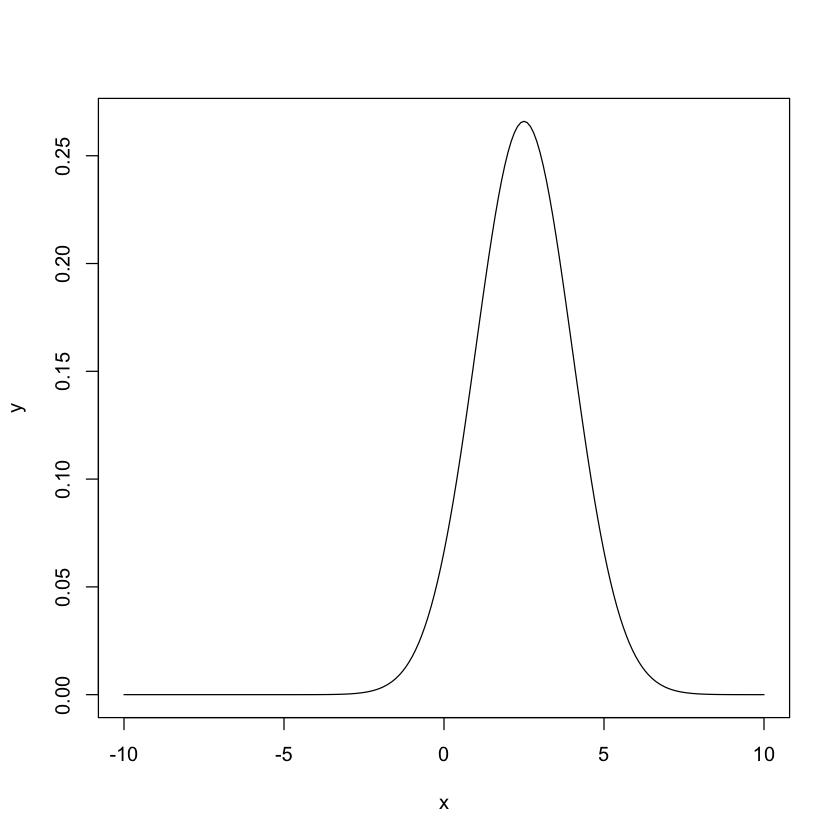

[1] 0.3694413

[1] 0.3445783

[1] 0.5888522

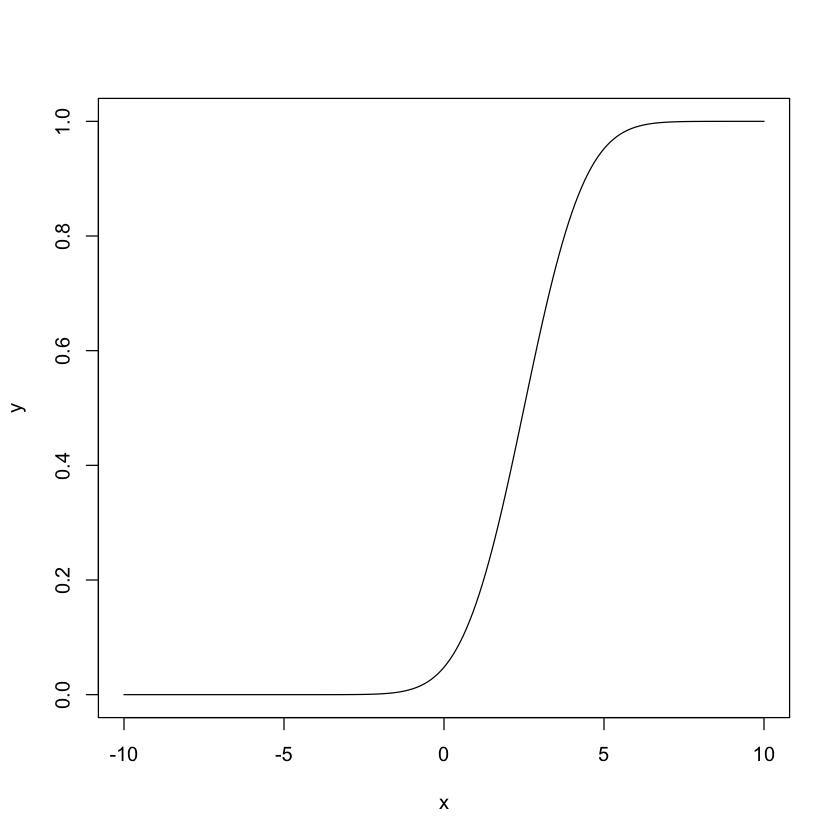

[1] 0.9882654 2.0000000 3.0117346

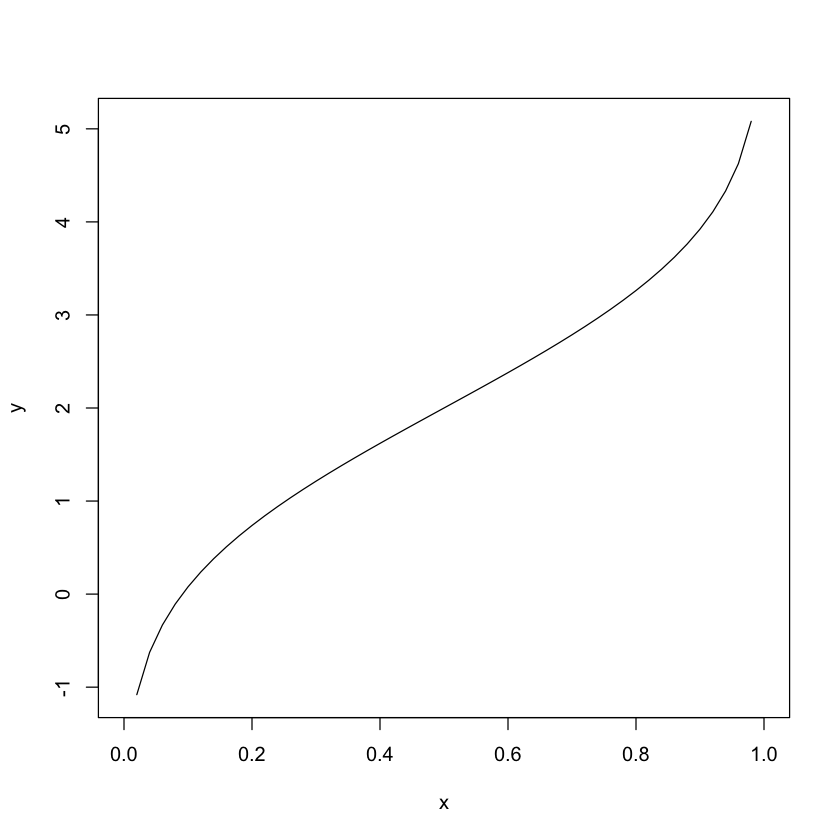

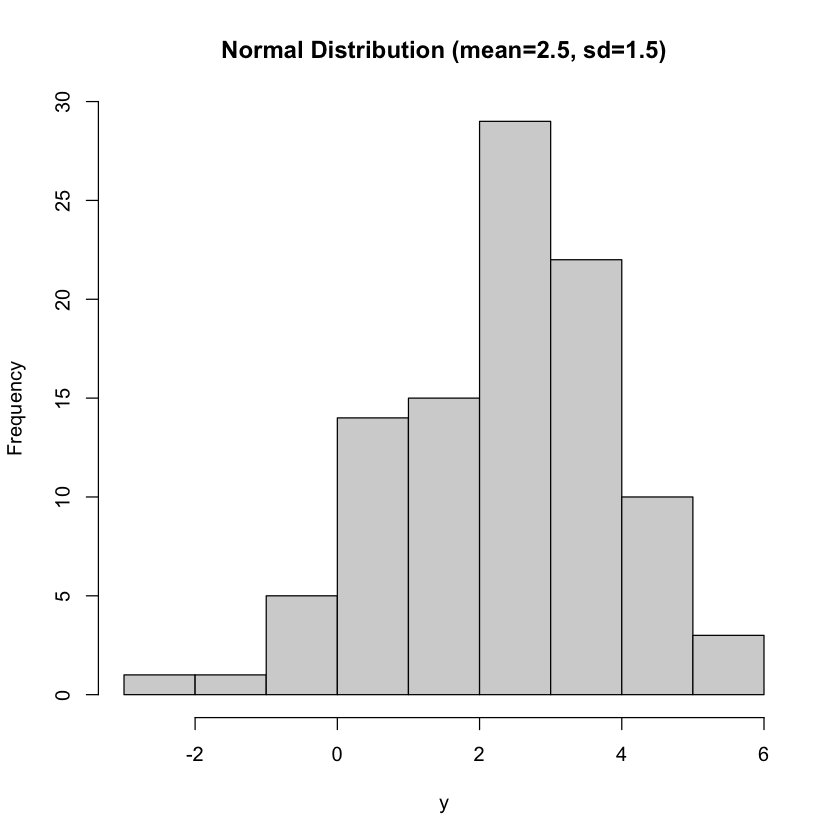

In [6]:
2############################################################
# R offers a number of functions for calculating with normal
# distributions. Call them up in the RStudio Help area with 
# the keyword Normal and familiarize yourself with them.
# R has four in built functions to generate normal distribution.
# 
# file: prob_nd_rfunctions_sol.R
#############################################################

# The function dnorm() gives height of the probability density
# at each point for a given mean and standard deviation. Apply 
# this function to create a plot the density of the normal 
# distribution with mean 2.5 and standard deviation 1.5.
x <- seq(-10, 10, by = .1)
y <- dnorm(x, mean = 2.5, sd = 1.5)
plot(x,y, type = "l")

# pnorm() gives the probability of a normally distributed random 
# variable to be less that the value of a given number (cumulative
# distribution function). Apply this function to create a plot of
# the normal distribution function with mean 2.5 and standard 
# deviation 1.5. Furthermore evaluate the probabilities 
# P(X <= 2), P(X > 3.1), P(1 < X <= 3.5) if X ~ N(2.5, 1.5^2)
x <- seq(-10,10,by = .1)
y <- pnorm(x, mean = 2.5, sd = 1.5)
plot(x,y, type = "l")
pnorm(2, mean = 2.5, sd = 1.5) # P(X <= 2)
1-pnorm(3.1, mean = 2.5, sd = 1.5) # P(X > 3.1)
# P(1 < X <= 3.5) if X ~ N(2.5, 1.5^2)
pnorm(3.5, mean = 2.5, sd = 1.5)  - pnorm(1, mean = 2.5, sd = 1.5) 

# qnorm() takes the probability value and gives a number whose
# cumulative value matches the probability value (quantile). 
# Apply this function to plot the quantiles of the normal distribution
# with mean 2.5 and standard deviation 1.5 and evaluate the 3 quartiles
# of the distribution
x <- seq(0, 1, by = 0.02)
y <- qnorm(x, mean = 2, sd = 1.5)
plot(x,y,type = "l")
# Quartiles
qnorm(c(0.25,0.5,0.75), mean = 2, sd = 1.5)

# rnorm() is used to generate random numbers whose distribution is
# normal. It takes the sample size as input and generates that many 
# random numbers. Draw a histogram to show the distribution of the 
# generated numbers which are normally distributed with mean 2.5 and 
# standard deviation 1.5.
y <- rnorm(100,mean = 2.5, sd = 1.5)
hist(y, main = "Normal Distribution (mean=2.5, sd=1.5)")


In [7]:
##################################################################
# In a silk spinning mill, raw fibers from silk cocoons are
# prepared to silk threads. It can be assumed that the useful silk
# thread length per cocoon is a normally distributed variable with
# expectation 800 m and variance 6400 m^2.
#
# file: prob_nd_silk_sol.R
##################################################################

# Calculate the probability that the useful silk thread length
# from a randomly selected cocoon is at least 750 m. Also calculate
# the probability that the useful silk thread length from a randomly
# selected cocoon exceeds 1000 m.
mu <- 800
sigma <- 80
pnorm(750,mu,sigma)
1-pnorm(1000,mu,sigma)

# Use appropriate assumptions and calculate the lower boundary
# L and the upper boundary U for the total length of the useful silk
# thread for 10000 cocoons. These boundaries should at the same time
# be guaranteed with a probability of 95%. The boundaries should be
# selected in such a way that the probability for exceeding U and going
# below L should be equally high.
n <- 10000
L <- qnorm(0.025,n*mu,n^0.5*sigma)
U <- qnorm(0.975,n*mu,n^0.5*sigma)
L; U # 7984320, 8015680

# Assume that the variance still is the same as before. How high
# must the expetation of the useful silk thread length at least be, if
# we would like the total useful silk length to be at least 750 m with
# a probability of 0.90.
mu_new <- 750-sigma*qnorm(0.1,0,1)
mu_new # 852.5241

# 10 cocoons are randomly chosen. With which probability is at
# most for one of these cocoons the useful silk thread length less
# than 750 m?
p <- pnorm(750,mu,sigma)
pbinom(1,10,p) # 0.2099118

[1] 0.2659855

[1] 0.006209665

[1] 7984320

[1] 8015680

[1] 852.5241

[1] 0.2099118

In [8]:
##############################################################################
# Exercise: Bayes and Binomial Distribution
# Consider the following random experiment: A fair die is rolled. Then, a fair
# coin is flipped many times according to the number of the die's points. The
# number of times heads occur is counted with the random variable Score.
#
# file: prob_die_coin_sol.R
##############################################################################

library(tidyverse)

# I: fair die rolled -> score
# II: flip a fair coin score times and counts the number of heads

# a) Determine the density of the random variable score. What are the expected
#    value and variance of Score?
tibble(
  score = rep(1:6, each=7),
  heads = rep(0:6, length.out = 6*7)
) %>%
  group_by(score,heads) %>%
  mutate(
    prob.heads.given.score = sum(dbinom(heads, size=score, prob=0.5)),
    prob.score = 1/6,
    prob.heads.and.score = prob.heads.given.score * prob.score
  ) %>%
  group_by(heads) %>%
  mutate(prob.heads = sum(prob.heads.and.score),
         prob.score.given.heads = prob.heads.and.score/prob.heads
  ) -> ds 

ds %>%
  select(heads, prob.heads) %>%
  unique() -> density.heads

E.X <- sum(density.heads$heads*density.heads$prob.heads) # 1.75
E.X2 <- sum(density.heads$heads^2*density.heads$prob.heads)
var.X <- E.X2-E.X^2 # 1.60417

# Alternative Bestimmung der Dichte der Anzahl Kopf
density.heads <- tibble(x=0:6) %>%
  # rowwise evaluation!!!!!
  rowwise() %>% 
  mutate(
    # size >= 1!!!
    dens.heads = sum(dbinom(x,size=max(1,x):6, prob = 0.5))/6
  )

# b) Let only the number of heads be known. What are the probabilities for the
#    values of the score with respect to the different numbers of heads?
# P(Score = s | heads = h) > 0 if s >= h!!!
bayes <- ds %>%
  select(heads,score,prob.score.given.heads) %>%
  arrange(heads, score) %>%
  filter(prob.score.given.heads>0)

In [9]:
######################################################
# In a game a player can bet 1$ on any of the numbers 
# 1, 2, 3, 4, 5 and 6. Three dice are rolled. If the 
# players number appears k times, where k >= 1, the player
# gets k$ back plus the original stack of 1$. Over the 
# long run, how many cents per game a player expects to 
# win or lose playing this game?
#
# file: prob_rv_exp_value_sol.R
#######################################################

library(tidyverse)

# create a tibble with the different outcomes and their
# probabilities
R <- tibble(
    k=0:3,
    prob=dbinom(k, size = 3, prob = 1/6), 
    #prob=choose(3,k)*(1/6)**k*(5/6)**(3-k),
    r = if_else(k==0,-1,-1+1+k))
R
# expected value
exp_r <- sum(R[,2]*R[,3])
exp_r 



k,prob,r
<int>,<dbl>,<dbl>
0,0.57870370,-1
1,0.34722222,1
2,0.06944444,2
3,0.00462963,3


[1] -0.0787037

[1]  4  9  3  4  3  8  6  4  6  6  4  2  6  7 10  6  6  9  4  7

[1] 0.5835862

[1] 0.5835862

[1] 5 6 7

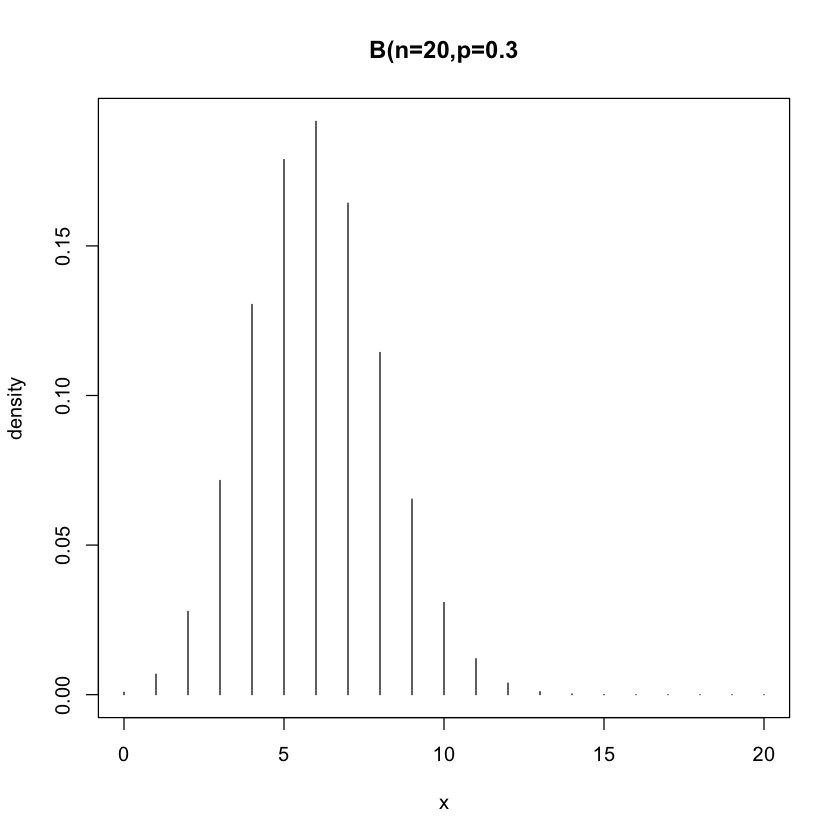

[1] 8 7 3 5 2 8 4 3 7 7 4 7 7 9 5 6 9 8 6 3

[1] 0.5990074

[1] 0.5990074

[1] 5 6 7

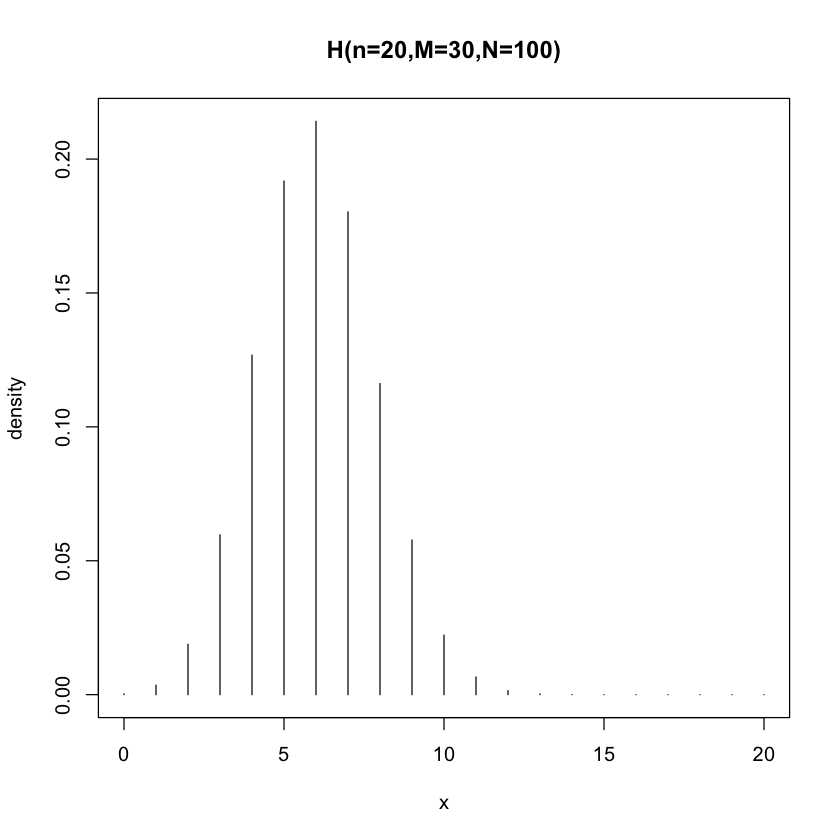

In [10]:
#####################################################################
# R offers for a large number of probability distributions functions.
# The commands for each distribution are prepended with a letter to 
# indicate the functionality:
# "d" 	returns the height of the probability density function
# "p" 	returns the cumulative density function
# "q" 	returns the inverse cumulative density function (quantiles)
# "r" 	returns randomly generated numbers
# Consider an urn with 100 balls, where are 30 balls of them are red. 
# 20 balls are randomly drawn and let X be the number of red drawn balls. 
# a) Determine the distribution of X if the balls are drawn with resp.
# without replacement.
# b) Plot the density of X.
# c) Generate a sample of size 20 of values of X
# d) Compute P(5 < X < 15). 
# e) Determine the 25% quantile, the median and the 75% quantile of X.
# 
# file: prob_rv_rfunctions_sol.R
########################################################################

par(mfcol=c(1,1))

# with replacement: X ~ B(n=20,p=0.3)

# plot of the density
k <- 0:20
plot(k,dbinom(k,20,0.3), type = "h", main ="B(n=20,p=0.3", xlab="x", 
     ylab="density")
# sample of size 20
rbinom(n=20,size = 20,prob = 0.3)
# P(5 < X < 15)
sum(dbinom(6:14, size = 20, prob = 0.3))
pbinom(14, size = 20, prob = 0.3) - pbinom(5, size = 20, prob = 0.3) 
# quantile
qbinom(c(0.25,0.5,0.75), size = 20, prob = 0.3)

# without replacement: X ~ H(n=20,M=30,N=100)

# plot of the density
k <- 0:20
plot(k,dhyper(k,m=30,n=70,k=20), type = "h", main ="H(n=20,M=30,N=100)",
     xlab="x", ylab="density")
# sample of size 20
rhyper(20,m=30,n=70,k=20)
# P(5 < X < 20)
sum(dhyper(6:14,m=30,n=70,k=20))
phyper(14,m=30,n=70,k=20) - phyper(5,m=30,n=70,k=20)
# quantile
qhyper(c(0.25,0.5,0.75),m=30,n=70,k=20)


In [11]:
####################################################################
# Consider a lottery of 20 tickets. Among the tickets there 
# are a first prize, 4 second prizes and 15 rivets. 5 tickets
# are drawn from the lottery drum. Determine the probability that
# a) 2 rivets have been drawn.
# b) 2 rivets, 2 second prizes and the first prize were drawn.
# c) The 5th lot drawn is the first lot which is not a rivet.
# Calculate the probabilities if the lots are drawn with replacement.
# What results will be obtained if the number of lots in the drum is
# increased (with equal proportions of first prizes, second prizes
# and rivets)?
#
# file: prob_rv_rivet_sol.R
#####################################################################

library(tidyverse)

fp <- 1
sp <- 4
riv <- 15
n <- 5

# without replacement
# a) hypergeometric distribution
# H(k, M, N+M) density:
#dhyper(x = number of white balls drawn, 
#       m = number of white balls in the urn, 
#       n	= number of black balls in the urn, 
#       k	= the number of balls drawn from the urn)
pa <- dhyper(2,riv,fp+sp,n)
pa # = choose(15,2)*choose(5,3) / choose(20,5)

# b) generalised hypergeometric distribution
pb <- choose(riv,2)*choose(sp,2)*choose(fp,1) /
  choose(riv+fp+sp,n)
pb
# c) geometric distribution
pc <- (choose(riv,n-1)/choose(fp+sp+riv,n-1)) *
  (fp+sp)/(fp+sp+riv-(n-1))
pc

# results with and without replacement for increasing
# number of tickets but constant proportion of the
# prizes
results <-
  tibble(
    m = seq(from=1,to=55,by=5),
    fp = m,
    sp = 4*m,
    riv = 15*m,
    pa_worepl = dhyper(2,riv,fp+sp,5),
    pa_wrepl = dbinom(2,5,riv/(riv+fp+sp)),
    pb_worepl = choose(riv,2)*choose(sp,2)*choose(fp,1) /
      choose(riv+fp+sp,1+2+2),
    pb_wrepl = factorial(1+2+2)/
      (factorial(2)*factorial(2)*factorial(1))*
      (riv/(riv+fp+sp))^2 * (sp/(riv+fp+sp))^2 *
      (fp/(riv+fp+sp))^1,
    pc_worepl = (choose(riv,5-1)/choose(fp+sp+riv,5-1)) *
      (fp+sp)/(fp+sp+riv-(5-1)),
    pc_wrepl = dgeom(5-1,(fp+sp)/(fp+sp+riv))
  )
results


[1] 0.06772446

[1] 0.04063467

[1] 0.0880418

m,fp,sp,riv,pa_worepl,pa_wrepl,pb_worepl,pb_wrepl,pc_worepl,pc_wrepl
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,4,15,0.06772446,0.08789063,0.04063467,0.03375,0.08804180,0.07910156
6,6,24,90,0.08532096,0.08789063,0.03480086,0.03375,0.08044548,0.07910156
11,11,44,165,0.08652136,0.08789063,0.03431833,0.03375,0.07982820,0.07910156
16,16,64,240,0.08695743,0.08789063,0.03413947,0.03375,0.07959949,0.07910156
21,21,84,315,0.08718285,0.08789063,0.03404624,0.03375,0.07948029,0.07910156
26,26,104,390,0.08732056,0.08789063,0.03398902,0.03375,0.07940714,0.07910156
31,31,124,465,0.08741342,0.08789063,0.03395033,0.03375,0.07935767,0.07910156
36,36,144,540,0.08748026,0.08789063,0.03392242,0.03375,0.07932199,0.07910156
41,41,164,615,0.08753068,0.08789063,0.03390133,0.03375,0.07929503,0.07910156


In [12]:
###################################################################
# Suppose that two fair, standard dice are tossed and the sequence
# of scores (X_1,X_2) are recorded. Let Y=X_1+X_2, denote the sum
# of the scores, U=min (X_1,X_2), the minimum score, and
# V=max (X_1,X_2) the maximum score.
#
# file: prob_rv_rolling_dice_sol.R
###################################################################

library(tidyverse)

#################################################################
# solution without gtools
#################################################################
# a) Find the probability density function of (X_1,X_2).
# expand.grid() create a data frame from all combinations of the
# supplied vectors or factors.
x1_x2_dens <- tibble(
  x1 = rep(1:6, length.out=6^2),
  x2 = rep(1:6, each=6, length.out=6^2),
  prob = 1/6^2
)
x1_x2_dens

# b) Find the probability density function of Y.
x1_x2_dens %>%
  mutate(y = x1+x2) %>%
  count(y) %>%
  mutate(prob = n/36) %>%
  select(-n) -> y_dens
y_dens

# c) Find the probability density function of U.
# apply() returns a vector or array or list of values obtained by
# applying a function to margins of an array or matrix.
x1_x2_dens %>%
  rowwise() %>%
  mutate(u = min(x1,x2)) %>%
  count(u) %>%
  mutate(prob = n/36) %>%
  select(-n) -> u_dens
u_dens

# d) Find the probability density function of V.
x1_x2_dens %>%
  rowwise() %>%
  mutate(v = max(x1,x2)) %>%
  count(v) %>%
  mutate(prob = n/36) %>%
  select(-n) -> v_dens
v_dens

# e) Find the probability density function of (U,V).
x1_x2_dens %>%
  rowwise() %>%
  mutate(
    u = min(x1,x2),
    v = max(x1,x2)
  ) %>%
  count(u,v) %>%
  mutate(prob = n/36) %>%
  select(-n) -> uv_dens
uv_dens

x1,x2,prob
<int>,<int>,<dbl>
1,1,0.02777778
2,1,0.02777778
3,1,0.02777778
4,1,0.02777778
5,1,0.02777778
6,1,0.02777778
1,2,0.02777778
2,2,0.02777778
3,2,0.02777778


y,prob
<int>,<dbl>
2,0.02777778
3,0.05555556
4,0.08333333
5,0.11111111
6,0.13888889
7,0.16666667
8,0.13888889
9,0.11111111
10,0.08333333


u,prob
<int>,<dbl>
1,0.30555556
2,0.25000000
3,0.19444444
4,0.13888889
5,0.08333333
6,0.02777778


v,prob
<int>,<dbl>
1,0.02777778
2,0.08333333
3,0.13888889
4,0.19444444
5,0.25000000
6,0.30555556


u,v,prob
<int>,<int>,<dbl>
1,1,0.02777778
1,2,0.05555556
1,3,0.05555556
1,4,0.05555556
1,5,0.05555556
1,6,0.05555556
2,2,0.02777778
2,3,0.05555556
2,4,0.05555556
